In [65]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [66]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [67]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [68]:
print(data.info())
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB
None

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insu

In [69]:
data.shape,test.shape

((50882, 14), (21805, 13))

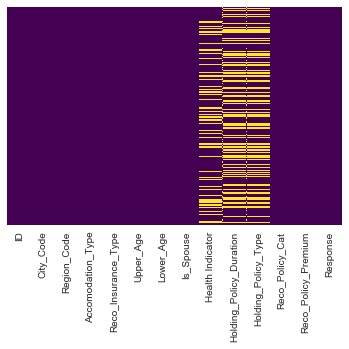

In [70]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

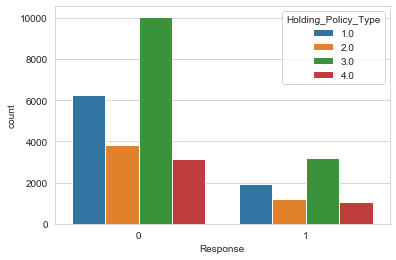

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Response',hue='Holding_Policy_Type',data=data)

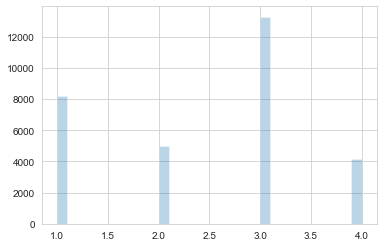

In [72]:
data['Holding_Policy_Type'].hist(bins=30,alpha=0.3)

In [73]:
data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

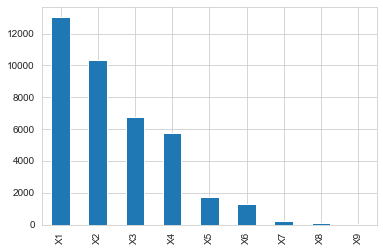

In [74]:
data['Health Indicator'].value_counts().plot.bar()

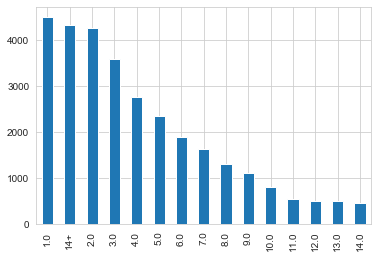

In [75]:
data['Holding_Policy_Duration'].value_counts().plot.bar()

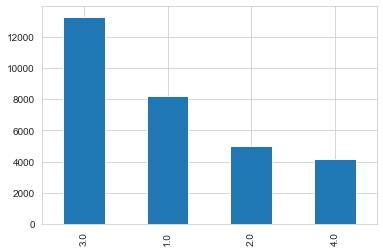

In [76]:
data['Holding_Policy_Type'].value_counts().plot.bar()

In [77]:
data['Health Indicator'].value_counts().index[0]

'X1'

In [78]:
def impute_nan(data,test,variable):
    most_frequent_category=data[variable].value_counts().index[0]
    data[variable].fillna(most_frequent_category,inplace=True)
    test[variable].fillna(most_frequent_category,inplace=True)

In [79]:
for feature in ['Health Indicator','Holding_Policy_Type','Holding_Policy_Duration']:
    impute_nan(data,test,feature)

In [80]:
data.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

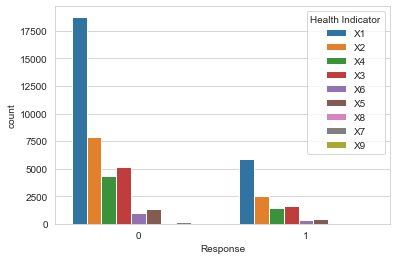

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='Response',hue='Health Indicator',data=data)

In [82]:
data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.662415,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,0.841994,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,2.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


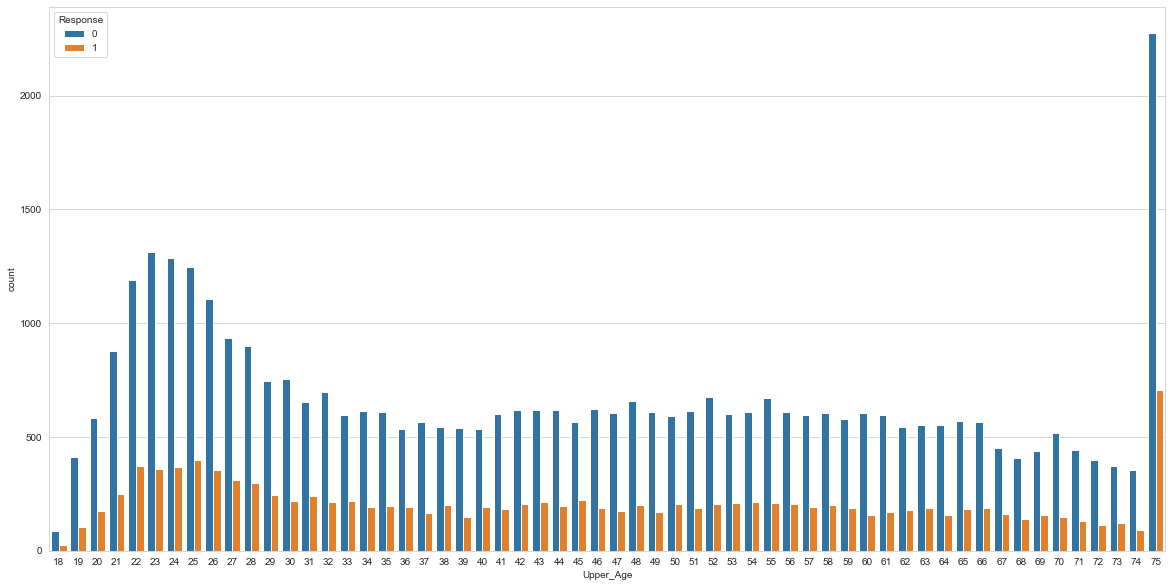

In [83]:
#Upper_Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Upper_Age',hue='Response',data=data)

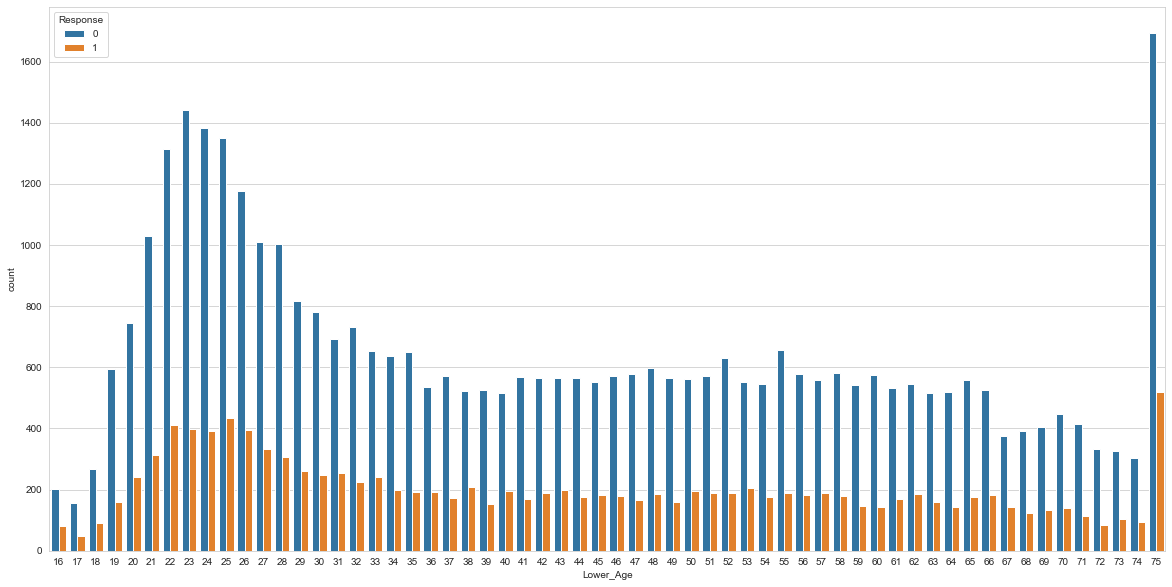

In [84]:
#Lower_Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Lower_Age',hue='Response',data=data)

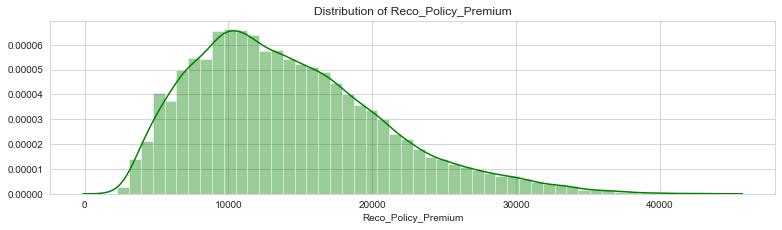

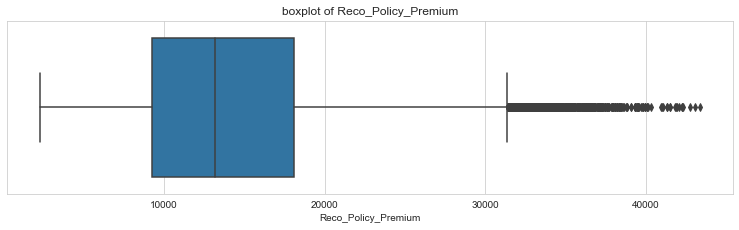

In [85]:
#Reco_Policy_Premium
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(data['Reco_Policy_Premium'], color='green')
plt.title("Distribution of Reco_Policy_Premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(data['Reco_Policy_Premium'])
plt.title("boxplot of Reco_Policy_Premium")
plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

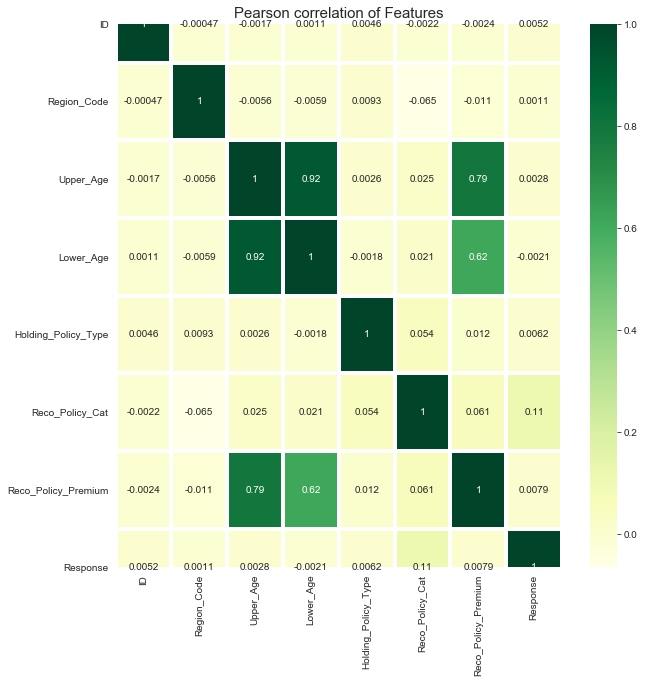

In [86]:
corr = data.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [87]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['City_Code'] = labelEncoder.fit_transform(data['City_Code'])
test['City_Code'] = labelEncoder.transform(test['City_Code'])

data['Accomodation_Type'] = labelEncoder.fit_transform(data['Accomodation_Type'])
test['Accomodation_Type'] = labelEncoder.transform(test['Accomodation_Type'])

data['Reco_Insurance_Type'] = labelEncoder.fit_transform(data['Reco_Insurance_Type'])
test['Reco_Insurance_Type'] = labelEncoder.transform(test['Reco_Insurance_Type'])

data['Is_Spouse'] = labelEncoder.fit_transform(data['Is_Spouse'])
test['Is_Spouse'] = labelEncoder.transform(test['Is_Spouse'])

data['Health Indicator'] = labelEncoder.fit_transform(data['Health Indicator'])
test['Health Indicator'] = labelEncoder.transform(test['Health Indicator'])

data['Holding_Policy_Duration'] = labelEncoder.fit_transform(data['Holding_Policy_Duration'])
test['Holding_Policy_Duration'] = labelEncoder.transform(test['Holding_Policy_Duration'])

In [88]:
data.dtypes

ID                           int64
City_Code                    int64
Region_Code                  int64
Accomodation_Type            int64
Reco_Insurance_Type          int64
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int64
Health Indicator             int64
Holding_Policy_Duration      int64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [89]:
#Checking duplicate rows
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [ID, City_Code, Region_Code, Accomodation_Type, Reco_Insurance_Type, Upper_Age, Lower_Age, Is_Spouse, Health Indicator, Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat, Reco_Policy_Premium, Response]
Index: []


In [90]:
#Seprating dependent and independent variables¶
x=data.drop(['Response'],axis=1) #contain all  independent variable
y=data['Response']

In [92]:
id = test.ID

In [15]:
x.drop(['ID'],axis=1,inplace=True) 
test.drop(['ID'],axis=1,inplace=True) 

In [93]:
x.shape,test.shape

((50882, 13), (21805, 13))

[0.13076325 0.10324704 0.13308137 0.01329702 0.00482673 0.09759486
 0.09828675 0.00574892 0.07121263 0.07021331 0.03483039 0.10740394
 0.12949376]


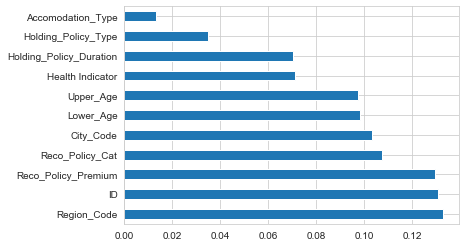

In [94]:
#Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [95]:
x=x.drop(['Accomodation_Type'],axis=1)  #Remove less important features
test.drop(['Accomodation_Type'],axis=1,inplace=True) 

Original dataset shape Counter({0: 38673, 1: 12209})
Resampled dataset shape Counter({0: 38673, 1: 38673})


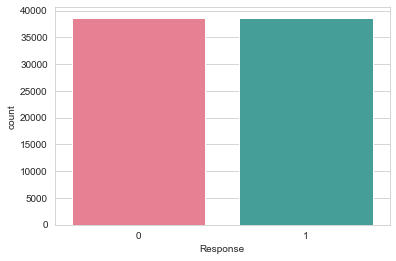

In [96]:
#Handling Imbalanced data
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [97]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(35617, 12) (15265, 12) (35617,) (15265,)


In [98]:
ytest.value_counts()

0    11513
1     3752
Name: Response, dtype: int64

In [99]:
test.shape,xtrain.shape

((21805, 12), (35617, 12))

### Logistic Regression

In [100]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(ytest,pred)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.754208974778906
ROC_AUC Score: 0.5


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     15265
           1       0.00      0.00      0.00         0

    accuracy                           0.75     15265
   macro avg       0.50      0.38      0.43     15265
weighted avg       1.00      0.75      0.86     15265



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


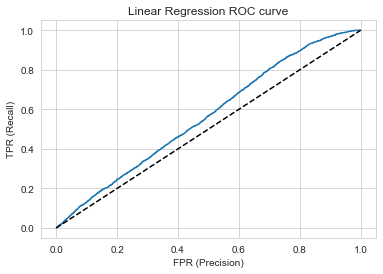

In [105]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[11513     0]
 [ 3752     0]]


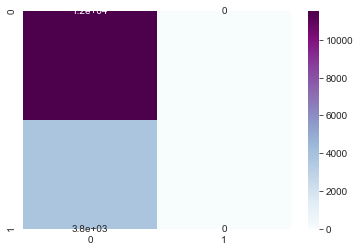

In [106]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

### RandomForest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.750802489354733
ROC_AUC Score: 0.5608677346470692


In [28]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     14960
           1       0.03      0.41      0.06       305

    accuracy                           0.75     15265
   macro avg       0.51      0.58      0.46     15265
weighted avg       0.97      0.75      0.84     15265



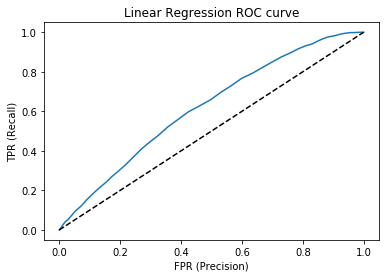

In [29]:
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[11333  3627]
 [  180   125]]


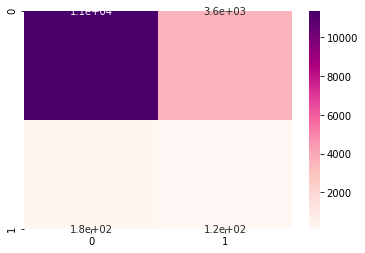

In [30]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

### XGBClassifier

In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.7540779561087455
ROC_AUC Score: 0.37708838367293457


In [32]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     15263
           1       0.00      0.00      0.00         2

    accuracy                           0.75     15265
   macro avg       0.50      0.38      0.43     15265
weighted avg       1.00      0.75      0.86     15265



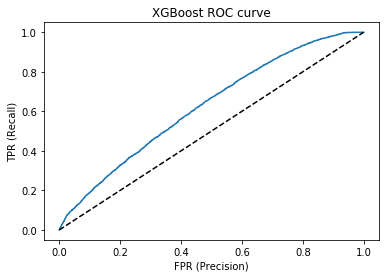

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[11511     2]
 [ 3752     0]]


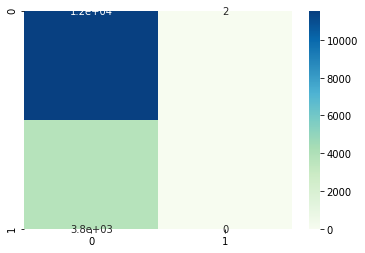

In [34]:
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

### Comparing the model

In [35]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.754209,0.000000,0.000000,0.000000,0.500000
Randomforest,0.750606,0.033316,0.409836,0.061622,0.583695
XGBClassifier,0.754078,0.000000,0.000000,0.000000,0.377088


### submission file

In [40]:
prediction = randomforest.predict_proba(test)

In [41]:
submission = pd.DataFrame(columns=["ID","Response"])

In [44]:
submission.ID = id
submission.Response = prediction[:,1]

In [45]:
submission.to_csv("Submission.csv",index=None)